
<h1><span style="color:blue">Busca y descarga el conjunto de datos “Climate Model Simulation Crashes” del repositorio UCI Machine Learning. Tiene los datos de un problema de clasificación binaria. Cárgalo adecuadamente en un Pandas DataFrame.</span></h1>


In [1]:
import numpy, random, time
from sklearn.model_selection import train_test_split

# Este es la libreria en python que permite la regresion logistica
from sklearn.linear_model import LogisticRegression

import pandas as pd
import sklearn

from sklearn.metrics import mean_squared_error,balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


In [2]:
file = 'climate_dataset.xlsx'

data = pd.read_excel(file)

#MIssing values
data.fillna(0,inplace=True)

data.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_6,vconst_7,ah_corr,...,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1



<h1><span style="color:blue">Realiza un conteo de las clases y analiza si hay desequilibrio.</span></h1>

Lo primero que hago es identificar si existe un desequilibrio.
Utilizo la clase **groupby** para ver cuantos datos hay de cada clase.

In [3]:
class_distribution = data.groupby('outcome').size()
print(class_distribution)

outcome
0     46
1    494
dtype: int64


Este es un caso de clasificación binaria en donde existe un claro desquilibrio entre clases.

Por lo tanto el **ACCURACY**  <span style="color:red">NO</span> será la mejor métrica para calcular el rendimiento del modelo predictivo.

Tendré que utilizar otras metricas para lograr compensar ese desequilibrio de clases.

<h1><span style="color:blue">Segmenta el conjunto de datos en entrenamiento y test.</span></h1>

#### Primero

Divido los datos entre los inputs y el output

In [4]:
X = data[data.columns[:-1]]
Y = data['outcome']

#### Segundo

Divido con la funcion **train_test_split**. Esto es más para juguetear con los datos , no para realizar experimentos sistematizados

Le paso todo el conjunto de datos

Ento me divide en 70% para entrenamiento y 30% para test

Vamos a continuar utilizando <span style="color:red"> **X_train** y **y_train** </span> en los modelos de validación

In [5]:
seed = random.randint(0,10)

# Aqui genero 4 dataframes nuevos (2 train, 2 test) 
#Usamos el 30% de instancias para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)

<h1><span style="color:blue">Normaliza las variables de entrada numéricas.</span></h1>

**Terecero**

Reescalamos los datos de entrada

Generamos el modelo de escalado mediante los datos de entrenamiento. En este caso utilizo **MinMaxScaler**

Y después transformamos los datos de entranamiento (X_train) mediante **stdScaler**

In [6]:
stdScaler = MinMaxScaler().fit(X_train)

X_train = stdScaler.transform(X_train)


<h1><span style="color:blue">Evalua el rendimiento de los modelos de Regresión Logística y kNearest Neigbours utilizando la métrica que consideres más
adecuada</span></h1>

<span style="color:red">Regresión logística</span>

Intancio un objeto de tipo Logistic regression

con el metodo **FIT** le inyecto los datos de entrenamiento (Variables de pendiente y la independiente)

In [7]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

Utilizo metodo predict , nos devuelve las predicciones para esas variables independeintes de los patrones reservados para test

In [8]:
y_pred = modelo.predict(X_test)

c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Ya con esas predicciones averiguo las métricas. COmo existe mucho desequilibrio entre clases **no** utilizo **accuracy**

In [9]:
# Esto se utiliza para problemas desequilibrados
bacc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [10]:
print(bacc)

0.6538461538461539


In [11]:
print(cm)

[[  4   9]
 [  0 149]]


<span style="color:red">KNN</span>

In [12]:
# Este es la libreria en python que permite el KNN
from sklearn.neighbors import KNeighborsClassifier

Reescalamos los datos de entrada

Generamos el modelo de escalado mediante los datos de entrenamiento.

Y después transformamos los datos de entranamiento (X_train) mediante **stdScaler**

Aqui es **SUPER IMPORTANTE** realizar el reescalado o NORMALIZACION. Puede ser un MinMax or un Standard

In [13]:
scaler = MinMaxScaler().fit(X_train)

scaler.fit(X_train)

X_train = scaler.transform(X_train)

Aqui le indico a mi modleo que deseo averiguar la distancia euclidea, la similaridad entre patrones

Y tambien definimos **K** que son los vecinos que definimos.

In [14]:
modelo = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

Ahora entreno el modelo mediante FIT

In [15]:
modelo.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [16]:
X_test = scaler.transform(X_test)

pred = modelo.predict(X_test)

c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Aqui tenemos que revisar si en un dataset balaceado o no para obtener la metrica correcta.

In [17]:
print(confusion_matrix(y_test, pred))

[[  0  13]
 [  0 149]]


In [18]:
print(balanced_accuracy_score(y_test, pred))

0.5


<h1><span style="color:blue">Utilizando el error de entrenamiento y test, busca el valor óptimo de
k. Recoge en una gráfica la evolución de los mismos. Los valores de k
estarán en el eje de abscisas y los de los errores en el de ordenadas. </span></h1>

In [34]:
# Este es la libreria en python que permite el KNN
from sklearn.neighbors import KNeighborsClassifier

En este caso lo que voy a hacer es una lista para guardar los errores

In [44]:
list = []

scaler = MinMaxScaler().fit(X_train)

scaler.fit(X_train)

X_train = scaler.transform(X_train)


In [45]:
for k in range(1,11):
    modelo = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    modelo.fit(X_train, y_train)
    X_test = scaler.transform(X_test)

    pred = modelo.predict(X_test)

    list.append(balanced_accuracy_score(y_test, pred))


In [46]:
print(list)

[0.5, 0.536654620547238, 0.4966442953020134, 0.5149716055756324, 0.4966442953020134, 0.5351058337635519, 0.5, 0.5, 0.5, 0.5]


Ahora realizo una gráfica con **X** (1-10) y **Y** (lista de errores)

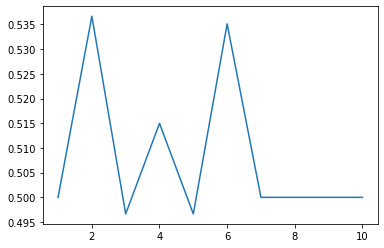

In [48]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([1, 2, 3, 4,5,6,7,8,9,10])
ypoints = list

plt.plot(xpoints, ypoints)
plt.show()

En este caso escojemos como hyper parámetro el 3 o al 5. Ese sería el valor optimo de K